In [1]:
from utils import split_and_preprocess, fit_basic_models, models_grid_search, evaluate_pipelines
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
base_dir = Path("../../data/mollipo")
X_train, y_train, X_test, y_test, X_eval, y_eval = split_and_preprocess(base_dir)

[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerator
[18:44:35] DEPRECATION WARNING: please use MorganGenerat

### Baseline models

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

In [4]:
models = [
    ("RandomForestRegressor", RandomForestRegressor()),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("LinearSVM", LinearSVR())
]

metrics = [mean_absolute_error, mean_squared_error, max_error, r2_score]

simple_models = fit_basic_models(X_train, y_train, models)

 75%|███████▌  | 3/4 [00:21<00:05,  5.52s/it]/home/tibor/Documents/msc-datascience/2024w/Toxic/ToxicML/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|██████████| 4/4 [00:22<00:00,  5.59s/it]


In [5]:
evaluate_pipelines(simple_models, metrics, X_train, y_train)

,model,mean_absolute_error,mean_squared_error,max_error,r2_score
0,RandomForestRegressor,0.187882,0.064762,1.431440,0.955875
1,Lasso,0.979292,1.467700,3.661751,0.000000
2,Ridge,0.563590,0.514961,3.884752,0.649137
3,LinearSVM,0.557572,0.549993,5.163291,0.625269


In [6]:
evaluate_pipelines(simple_models, metrics, X_eval, y_eval)

,model,mean_absolute_error,mean_squared_error,max_error,r2_score
0,RandomForestRegressor,0.609851,0.619291,3.525267,0.582494
1,Lasso,1.006285,1.484697,3.261751,-0.000935
2,Ridge,0.683129,0.935416,9.890663,0.369372
3,LinearSVM,0.712906,1.067654,10.670875,0.280222


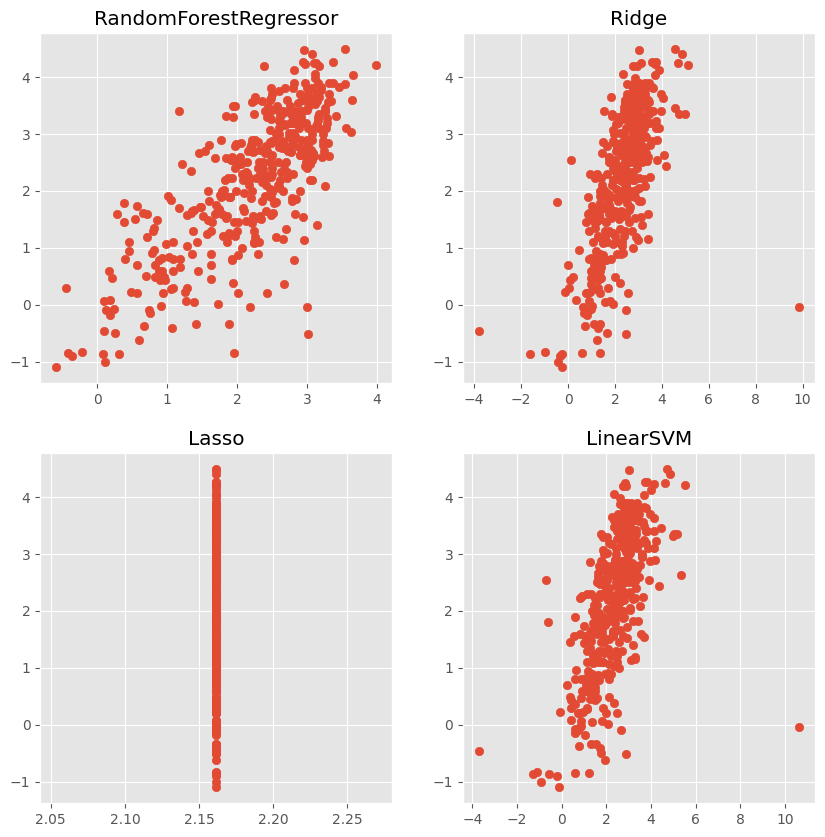

In [17]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, ax = plt.subplots(2,2, figsize=(10,10))

for i, (name, model) in enumerate(simple_models):
    y_pred = model.predict(X_eval)
    ax[i % 2][i // 2].scatter(y_pred, y_eval)
    ax[i % 2][i // 2].set_title(name)

### Grid search

In [18]:
from skopt.space import Real, Categorical, Integer

rfr_grid = {
    "RandomForestRegressor__max_depth": Categorical([5,10,15]),
    "RandomForestRegressor__n_estimators": Integer(50,150),
    "RandomForestRegressor__n_estimators": Integer(50,150),
}

lasso_grid = {
    "Lasso__alpha": Real(0.01, 100),
}

ridge_grid = {
    "Ridge__alpha": Real(0.01, 100),
}

svm_grid = {
    "LinearSVM__C": Real(0.0001, 10),
}

In [22]:
models_grid_simple = [
    ("Lasso", Lasso(), lasso_grid),
    ("Ridge", Ridge(), ridge_grid),
    ("LinearSVM", LinearSVR(max_iter=1000), svm_grid)
]


pipelines_grid_simple = models_grid_search(models_grid_simple, X_train, y_train, n_iter=25, cv=5, scoring="neg_mean_squared_error")


  0%|          | 0/3 [00:00<?, ?it/s]/home/tibor/Documents/msc-datascience/2024w/Toxic/ToxicML/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [66.76447160093174]
  warnings.warn(
/home/tibor/Documents/msc-datascience/2024w/Toxic/ToxicML/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [55.73502632758668]
  warnings.warn(
/home/tibor/Documents/msc-datascience/2024w/Toxic/ToxicML/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using random point [84.00174143072334]
  warnings.warn(
/home/tibor/Documents/msc-datascience/2024w/Toxic/ToxicML/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01] before, using r

In [23]:
models_grid_rf = [
    ("RandomForestRegressor", RandomForestRegressor(), rfr_grid),
]

pipelines_grid_simple += models_grid_search(models_grid_rf, X_train, y_train, n_iter=10, cv=5, scoring="neg_mean_squared_error")

100%|██████████| 1/1 [08:49<00:00, 529.35s/it]


In [24]:
evaluate_pipelines(pipelines_grid_simple, metrics, X_train, y_train)

,model,mean_absolute_error,mean_squared_error,max_error,r2_score
0,Lasso,0.615248,0.594139,3.530101,0.595190
1,Ridge,0.567449,0.521194,3.950490,0.644891
2,LinearSVM,1.914826,4.617108,4.560319,-2.145811
3,RandomForestRegressor,0.232572,0.092637,1.667067,0.936883


In [25]:
evaluate_pipelines(pipelines_grid_simple, metrics, X_eval, y_eval)

,model,mean_absolute_error,mean_squared_error,max_error,r2_score
0,Lasso,0.695592,0.910692,8.294026,0.386040
1,Ridge,0.679734,0.926124,9.812714,0.375637
2,LinearSVM,1.908922,4.569131,4.064819,-2.080362
3,RandomForestRegressor,0.614670,0.629434,3.591070,0.575656


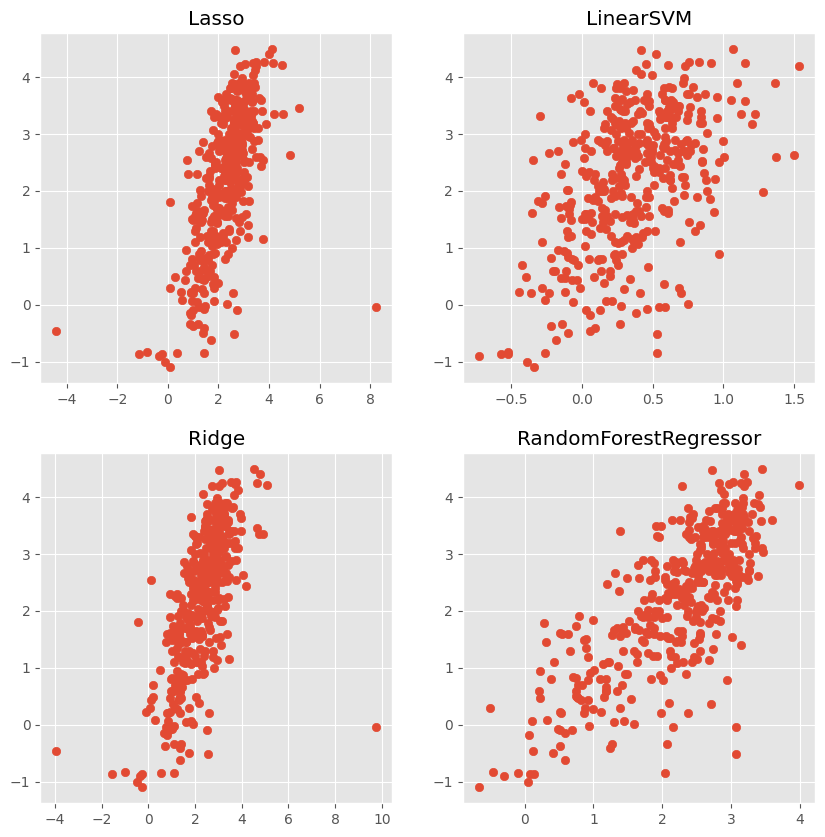

In [27]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, ax = plt.subplots(2,2, figsize=(10,10))

for i, (name, model) in enumerate(pipelines_grid_simple):
    y_pred = model.predict(X_eval)
    ax[i % 2][i // 2].scatter(y_pred, y_eval)
    ax[i % 2][i // 2].set_title(name)

### Save models

In [26]:
import joblib
for name, model in pipelines_grid_simple:
    joblib.dump(model, base_dir.parent.parent / "models" /(name + "_lipo.pkg"))